# Project 1 - Medical Appointment No Shows

---

- Data: https://www.kaggle.com/datasets/joniarroba/noshowappointments?select=KaggleV2-May-2016.csv
- What if that possible to predict someone to no-show an appointment?
  
---
 

## Load Cleaned Data for Analysis
See DataCleaning.ipynb for the data cleaning process.

In [43]:
# Dependencies and Setup
import pandas as pd
import hvplot.pandas
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Read in data
df = pd.read_csv('data_cleaned.csv')
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Scheduled_Day_Date,Scheduled_Hour,Scheduled_Day_of_Week,Scheduled_Month,Appointment_Day_Date,Appointment_Day_of_Week,Appointment_Month,Days_Between,lat,lon
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,2016-04-29,18,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-22.788662,-43.079799
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,2016-04-29,17,Friday,4,2016-04-29,Friday,4,0,-23.354233,-44.725856
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112


## No Shows by Condition

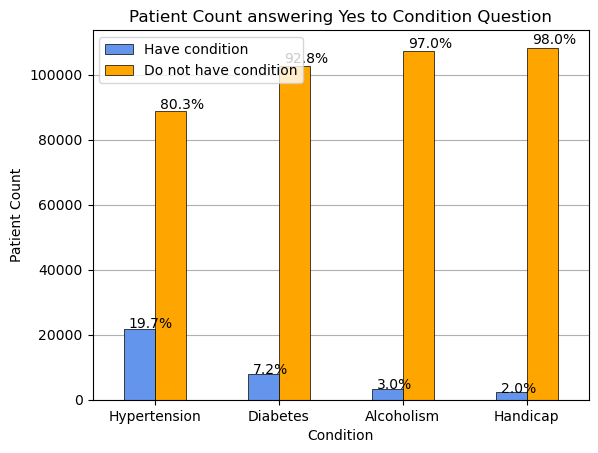

In [44]:
# Create bar plot of patient count answering yes and no to condition question

num_patients = len(df)
conditions_df = df[conditions].sum()
conditions_df = pd.DataFrame(conditions_df, columns=["count_with_condition"])
conditions_df["count_without_condition"] = num_patients-conditions_df["count_with_condition"]
conditions_df

ax = conditions_df.plot(kind = 'bar', 
        xlabel = 'Condition',
        ylabel = 'Patient Count',
        title = 'Patient Count answering Yes to Condition Question',
        edgecolor = 'black',
        linewidth = 0.5,
        rot = 0,
        color = ['cornflowerblue','orange']
        )
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.legend(['Have condition','Do not have condition'])

# Label bar heights
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100/num_patients,1) )  + '%', (p.get_x()  + p.get_width()/6, p.get_height() * 1.01))

# Save the figure
plt.savefig("output/Condition_distribution.png")
# Show figure
plt.show()

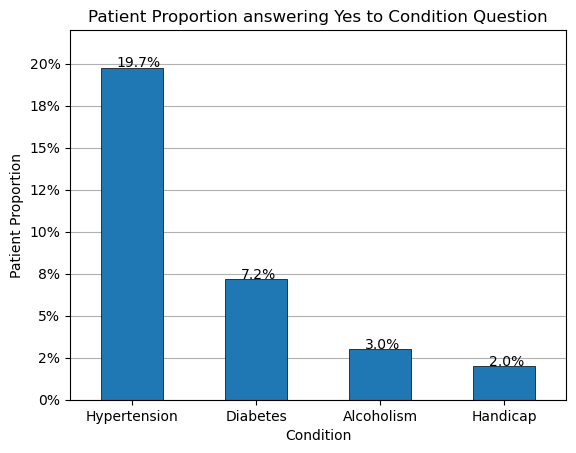

In [45]:
# Create bar plot of patient proportion answering yes to condition question
conditions = ['Hypertension','Diabetes','Alcoholism','Handicap']
conditions_avg = df[conditions].mean()

ax = conditions_avg.plot(kind = 'bar', 
        xlabel = 'Condition',
        ylabel = 'Patient Proportion',
        title = 'Patient Proportion answering Yes to Condition Question',
        edgecolor = 'black',
        linewidth = 0.5,
        rot = 0,
        )
ax.grid(axis='y')
ax.set_axisbelow(True)

# Label bar heights
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100,1) )  + '%', (p.get_x()  + p.get_width()/4, p.get_height() * 1.005))

# Change format of yticks to percentages
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])
ax.set_ylim([0,.22])

# Save the figure
plt.savefig("output/Condition_distribution_2.png")
# Show figure
plt.show()

In [46]:
# Proportion of no shows answering yes to condition questions
prop_hypertension = df[df['Hypertension']==1]['No_Show_Boolean'].mean()
prop_diabetes = df[df['Diabetes']==1]['No_Show_Boolean'].mean()
prop_alcoholism = df[df['Alcoholism']==1]['No_Show_Boolean'].mean()
prop_handicap = df[df['Handicap']==1]['No_Show_Boolean'].mean()
prop_no_condition = df[ (df['Hypertension']==0) & (df['Diabetes']==0) & (df['Alcoholism']==0) & (df['Handicap']==0) ]['No_Show_Boolean'].mean()

# Assemble the resulting series into a single summary DataFrame
prop_no_show_conditions = {
                    'Hypertension': prop_hypertension, 
                    'Diabetes': prop_diabetes, 
                    'Alcoholism': prop_alcoholism, 
                    'Handicap': prop_handicap,
                    'No Condition': prop_no_condition                    
                    }
prop_no_show_conditions = pd.DataFrame(data = prop_no_show_conditions,index=[0])
prop_no_show_conditions = prop_no_show_conditions.transpose()
prop_no_show_conditions

,0
Hypertension,0.173020
Diabetes,0.180033
Alcoholism,0.201488
Handicap,0.181615
No Condition,0.209276


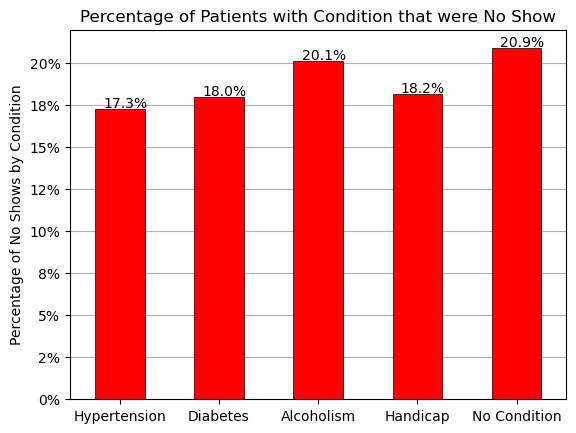

In [47]:
# Bar plot proportion of no shows by condition
ax = prop_no_show_conditions.plot(kind = 'bar',
                                     #xlabel = 'Condition',
                                     ylabel = 'Percentage of No Shows by Condition',
                                     title = 'Percentage of Patients with Condition that were No Show',
                                     edgecolor = 'black',
                                     color='red',
                                     linewidth = 0.5,
                                     rot = 0,
                                     label = 'No Show',
                                     #xticks = conditions
                                    )
ax.grid(axis='y')
ax.set_axisbelow(True)

# Change format of yticks to percentages
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])
ax.set_ylim([0,.22])

# Label bar heights
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100,1) )  + '%', (p.get_x()  + p.get_width()/6, p.get_height() * 1.005))

# Remove legend
ax.get_legend().remove()

# Save the figure
plt.savefig("output/No_shows_by_condition.png")
# Show figure
plt.show()

In [95]:
conditions = ['Hypertension','Diabetes','Alcoholism','Handicap']
conditions.append('No_Show_Boolean')
multiple_conditions_df = df[conditions]
multiple_conditions_df['Num_conditions'] =  multiple_conditions_df['Hypertension'] + multiple_conditions_df['Diabetes'] + multiple_conditions_df['Alcoholism'] + multiple_conditions_df['Handicap']
multiple_conditions_df = multiple_conditions_df.loc[multiple_conditions_df['Num_conditions']>0]
multiple_conditions_df

/var/folders/gy/21jkj99n1zjfb6rz1yhctrbw0000gn/T/ipykernel_53082/2325670139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_conditions_df['Num_conditions'] =  multiple_conditions_df['Hypertension'] + multiple_conditions_df['Diabetes'] + multiple_conditions_df['Alcoholism'] + multiple_conditions_df['Handicap']


,Hypertension,Diabetes,Alcoholism,Handicap,No_Show_Boolean,Num_conditions
0,1,0,0,0,False,1
4,1,1,0,0,False,2
5,1,0,0,0,False,1
25,1,0,0,0,False,1
26,1,0,0,0,False,1
...,...,...,...,...,...,...
110482,1,0,0,0,False,1
110491,1,0,0,0,True,1
110495,1,0,0,0,True,1
110498,1,1,0,0,False,2


In [96]:
prop_no_show_one_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==1]['No_Show_Boolean'].mean()
prop_no_show_two_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==2]['No_Show_Boolean'].mean()
prop_no_show_three_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==3]['No_Show_Boolean'].mean()
prop_no_show_four_cond = multiple_conditions_df[multiple_conditions_df['Num_conditions']==4]['No_Show_Boolean'].mean()

# Assemble the resulting series into a single summary DataFrame
prop_no_show_num_conditions = {
                    'One condition': prop_no_show_one_cond, 
                    'Two conditions': prop_no_show_two_cond, 
                    'Three conditions': prop_no_show_three_cond, 
                    'Four conditions': prop_no_show_four_cond,
                    }
prop_no_show_num_conditions = pd.DataFrame(data = prop_no_show_num_conditions,index=[0])
prop_no_show_num_conditions = prop_no_show_num_conditions.transpose()
prop_no_show_num_conditions

,0
One condition,0.179275
Two conditions,0.178637
Three conditions,0.153722
Four conditions,0.307692
